# Spotify Track Dataset (Kurzfassung)

- **track_id**: Spotify-ID des Tracks
- **artists**: Namen der Künstler, getrennt durch `;`.
- **album_name**: Name des Albums.
- **track_name**: Titel des Tracks.
- **popularity**: Beliebtheit (0–100), basierend auf Wiedergaben und Aktualität.
- **duration_ms**: Länge in Millisekunden.
- **explicit**: Enthält explizite Inhalte (`true`/`false`).
- **danceability**: Eignung zum Tanzen (0.0–1.0).
- **energy**: Intensität und Aktivität (0.0–1.0).
- **key**: Tonart (0 = C, 1 = C♯/D♭, …, -1 = keine).
- **loudness**: Lautstärke in dB.
- **mode**: Tonart (1 = Dur, 0 = Moll).
- **speechiness**: Anteil gesprochener Wörter (0.0–1.0).
- **acousticness**: Wahrscheinlichkeit, dass der Track akustisch ist (0.0–1.0).
- **instrumentalness**: Wahrscheinlichkeit, dass der Track ohne Gesang ist (0.0–1.0).
- **liveness**: Wahrscheinlichkeit einer Live-Aufnahme (0.0–1.0).
- **valence**: Stimmung des Tracks (positiv/negativ, 0.0–1.0).
- **tempo**: Tempo in BPM (Schläge pro Minute).
- **time_signature**: Taktart (3 = 3/4, 4 = 4/4, …).
- **track_genre**: Genre des Tracks.

In [46]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
69136,69136,6TfFDFW4qgeLwHN5anNLlC,Sujatha;Srinivas,Swapnakkoodu (Original Motion Picture Soundtrack),Oru Poo Mathram,40,248120,False,0.692,0.694,...,-6.618,1,0.1060,0.265,0.0,0.2430,0.718,106.871,4,malay
91592,91592,2EMYPLB3S0kgfAMmA5Y4Pz,The Beach Boys,Christmas Faves 2022,Little Saint Nick - 1991 Remix,0,118840,False,0.602,0.553,...,-9.336,1,0.0328,0.108,0.0,0.0512,0.971,130.594,4,rock
63617,63617,1uSZoflg0DrqGsJI1UNt56,SIAM SHADE,SIAM SHADE 5,グレイシャル LOVE,34,247706,False,0.459,0.957,...,-3.882,1,0.1100,0.103,0.0,0.3530,0.612,174.707,4,j-rock


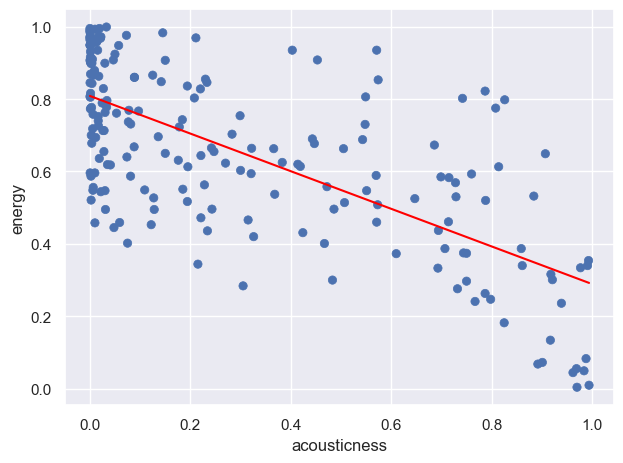

In [47]:

so.Plot(dataFrm.sample(200), x="acousticness", y="energy").add(
    so.Dot()  # Linie für die Regressionsanpassung
).add(so.Line(color='red'), so.PolyFit(order=1)).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()


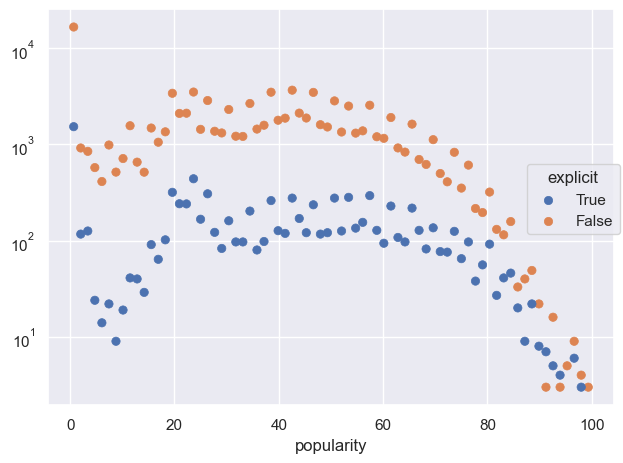

In [48]:
so.Plot(dataFrm, x="popularity", color="explicit").add(
    so.Dot(), so.Hist(),
).scale(
    y="log",  # Logarithmische Skalierung der y-Achse
    color_continuous="#1f77b4"  # Optionale Farbanpassung
).show()


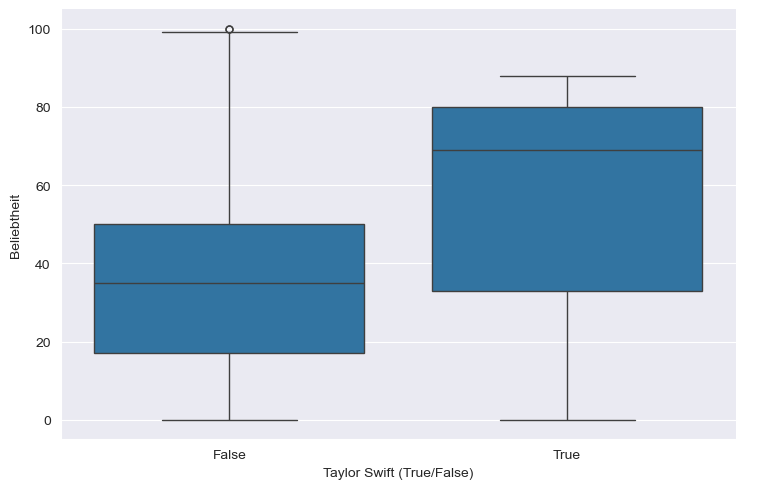

In [49]:
# Filter für Taylor Swift
taylor_swift = dataFrm[dataFrm['artists'].str.contains("Taylor Swift", na=False)]
others = dataFrm[~dataFrm['artists'].str.contains("Taylor Swift", na=False)]

# Neue Spalte für Gruppen
dataFrm['is_taylor'] = dataFrm['artists'].str.contains("Taylor Swift", na=False)

# Diagramm
sns.catplot(
    data=dataFrm,
    x='is_taylor',
    y='popularity',
    kind='box',
    aspect=1.5,
).set_axis_labels("Taylor Swift (True/False)", "Beliebtheit")



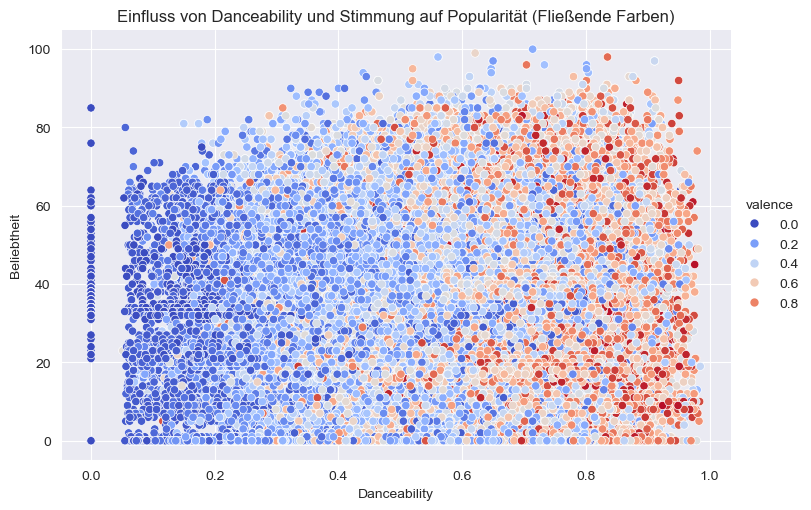

In [50]:
# Scatterplot mit fließenden Farben basierend auf Valence
sns.relplot(
    data=dataFrm,
    x='danceability',
    y='popularity',
    hue='valence',          # Farbskala basierend auf Valence
    palette='coolwarm',     # Farbpalette für fließende Werte
    height=5,
    aspect=1.5
).set_axis_labels("Danceability", "Beliebtheit").set(title="Einfluss von Danceability und Stimmung auf Popularität")



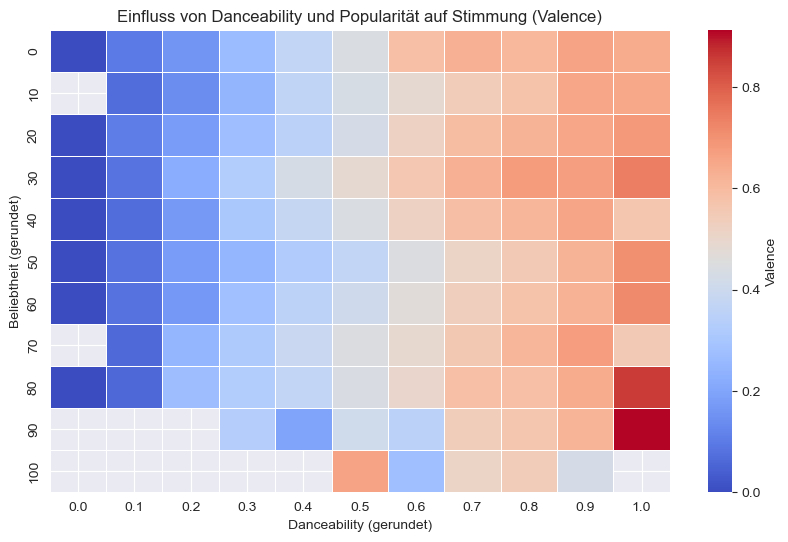

In [55]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset laden
dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])

# Danceability und Popularity runden, um die Heatmap lesbarer zu machen
dataFrm['danceability_bin'] = dataFrm['danceability'].round(1)  # Danceability auf 1 Dezimalstelle runden
dataFrm['popularity_bin'] = dataFrm['popularity'].round(-1)    # Popularity auf 10er Schritte runden

# Heatmap-Daten aggregieren: Durchschnitt von Valence
heatmap_data = dataFrm.pivot_table(
    index='popularity_bin',
    columns='danceability_bin',
    values='valence',
    aggfunc='mean'
)

# Heatmap erstellen
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',           # Farbverlauf
    cbar_kws={'label': 'Valence'},  # Farblegende beschriften
    linewidths=0.5
)
plt.title("Einfluss von Danceability und Popularität auf Stimmung (Valence)")
plt.xlabel("Danceability (gerundet)")
plt.ylabel("Beliebtheit (gerundet)")
plt.show()
